In [1]:
import os
import random
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np 
import pickle

### Internal classes
from loaders import ItemLoader
from items import Item 

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
%matplotlib inline

In [3]:
load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
ANTHROPIC_API_KEY = os.getenv("ANTHROPIC_API_KEY")
HF_TOKEN_KEY = os.getenv("HF_TOKEN")


# ### Set HF_HUB_DISABLE_PROGRESS_BARS environ to prevent an error for pushing dataset to repo.
# os.environ["HF_HUB_DISABLE_PROGRESS_BARS"] = "1"
# os.environ["HF_HUB_DISABLE_PROGRESS"] = "1"
# os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "0"  # disables fast-transfer backend
# os.environ["HF_HUB_DISABLE_SYMLINKS"] = "1"     # avoid Xet printer

In [4]:
login(HF_TOKEN_KEY, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [5]:
items = ItemLoader("Electronics").load()

print(items[0].prompt)

print(len(items))

Loading dataset: Electronics


  0%|                                                                           | 0/162 [00:00<?, ?it/s]None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only token

Completed Electronics with 477,816 datapoints in 2.7 mins
How much does this cost to the nearest dollar?

Main_Category: Computers

Digi-Tatoo Decal Skin Compatible With MacBook Pro 13 inch (Model A2338/ A2289/ A2251) - Protective and Decorative Full Body Laptop Skin Decal Sticker, Anti-Scratch Vinly Skin Sticker Wrap  Fresh Marble
WARNING  Please IDENTIFY MODEL NUMBER on the bottom of your Macbook. Only fits for model A2338/ A2289/ A2251 (Macbook Pro 13" w/ Touch Bar, release). Extra Care Yet Not Bulky. Our skin is capable of protecting the surface of your Macbook from daily scratches, dust, oil, water and fingerprint. Your Macbook remains fresh some years later. Elegant Style. Our stylish design and printing tech give your Macbook a 360 degree decorative and

Price is $20.00
477816


## Scale Up -- All Different Categories Into One List

In [6]:
dataset_names = [
    "All_Beauty", "Arts_Crafts_and_Sewing", "Cell_Phones_and_Accessories", 
    "Electronics", "Gift_Cards", "Handmade_Products", "Industrial_and_Scientific", 
    "Musical_Instruments", "Toys_and_Games"
]

In [7]:
items = [] 
for dataset_name in dataset_names: 
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())

Loading dataset: All_Beauty


  0%|                                                                        | 0/12 [00:00<?, ?it/s]None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizer

Completed All_Beauty with 6,522 datapoints in 0.1 mins
Loading dataset: Arts_Crafts_and_Sewing


  0%|                                                                        | 0/81 [00:00<?, ?it/s]None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizer

Completed Arts_Crafts_and_Sewing with 331,924 datapoints in 1.3 mins
Loading dataset: Cell_Phones_and_Accessories


  0%|                                                                       | 0/129 [00:00<?, ?it/s]None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizer

Completed Cell_Phones_and_Accessories with 245,210 datapoints in 2.0 mins
Loading dataset: Electronics


  0%|                                                                       | 0/162 [00:00<?, ?it/s]None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizer

Completed Electronics with 477,816 datapoints in 3.1 mins
Loading dataset: Gift_Cards


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.67s/it]

Completed Gift_Cards with 339 datapoints in 0.1 mins
Loading dataset: Handmade_Products



  0%|                                                                        | 0/17 [00:00<?, ?it/s]None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenize

Completed Handmade_Products with 68,440 datapoints in 0.3 mins
Loading dataset: Industrial_and_Scientific


  0%|                                                                        | 0/43 [00:00<?, ?it/s]None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizer

Completed Industrial_and_Scientific with 190,990 datapoints in 0.8 mins
Loading dataset: Musical_Instruments


  0%|                                                                        | 0/22 [00:00<?, ?it/s]None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizer

Completed Musical_Instruments with 74,435 datapoints in 0.4 mins
Loading dataset: Toys_and_Games


  0%|                                                                        | 0/90 [00:00<?, ?it/s]None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizer

Completed Toys_and_Games with 367,700 datapoints in 1.8 mins


In [7]:
print(f"Grand Total of {len(items):,} Items.")

Grand Total of 477,816 Items.


In [9]:
print(items[300000].main_category)

Tools & Home Improvement


In [10]:
print(items[300000].title)

Games Workshop Citadel Technical: Valhallan Blizzard


In [11]:
print(items[300000].category)

Arts_Crafts_and_Sewing


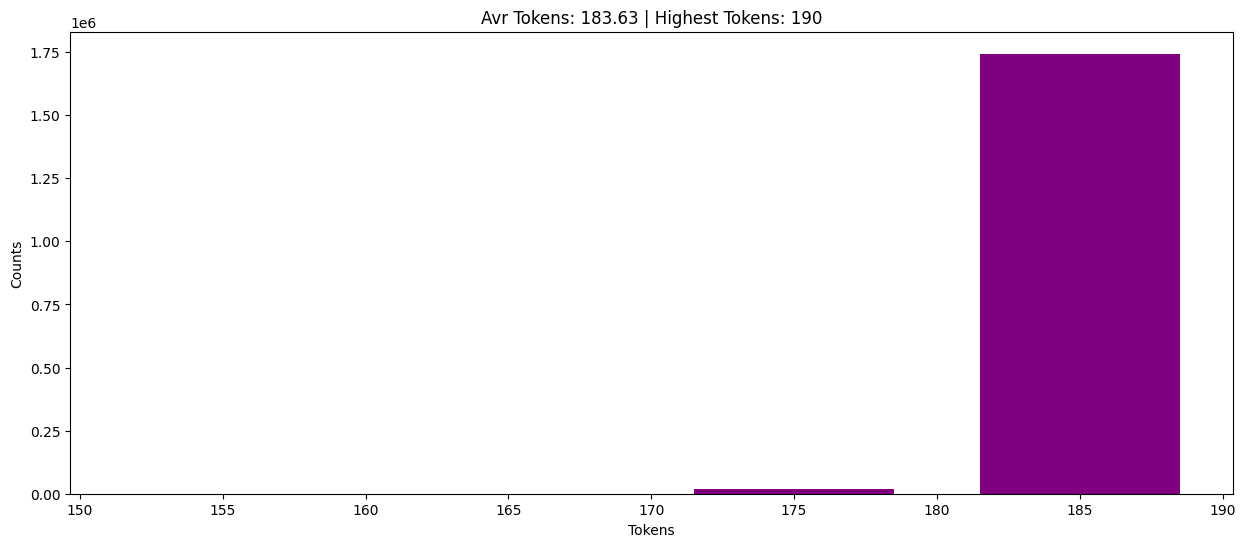

In [12]:
### Count tokens -- Avr and highest out of the all items 
tokens = [item.token_count for item in items]

plt.figure(figsize=(15, 6))
plt.title(f"Avr Tokens: {sum(tokens) / len(tokens):.2f} | Highest Tokens: {max(tokens)}")
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.hist(tokens, rwidth=0.7, color="purple", bins = range(150, 200, 10))
plt.show()

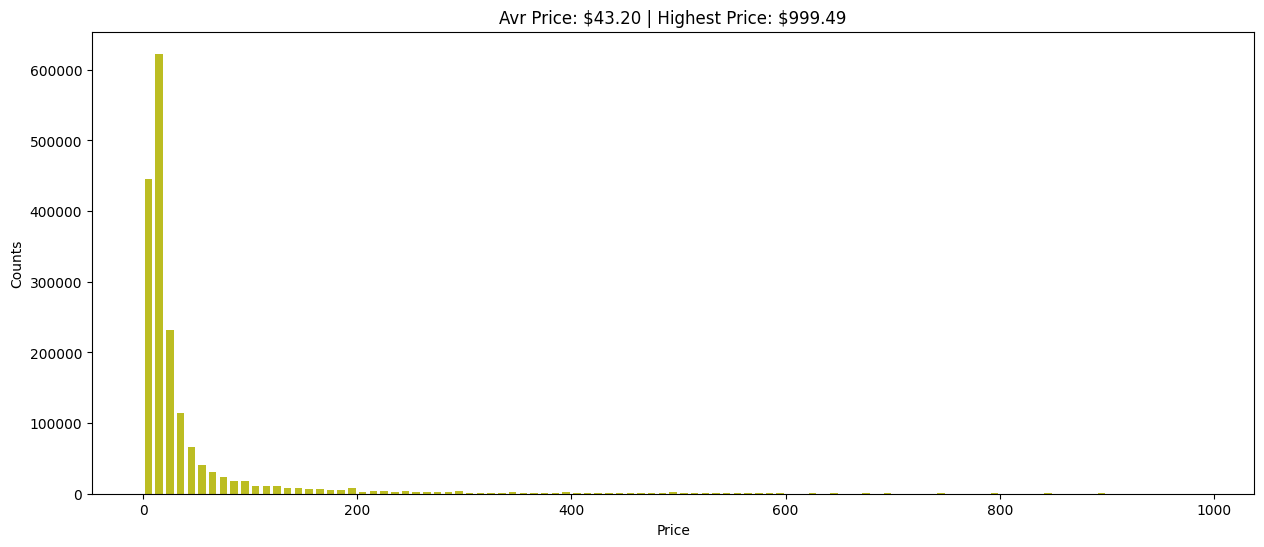

In [13]:
### Price distribution out of the all items
### (Avr price and highest)

prices = [item.price for item in items]

plt.figure(figsize=(15, 6))
plt.title(f"Avr Price: \\${sum(prices) / len(prices):,.2f} | Highest Price: ${max(prices):,}")
plt.xlabel("Price")
plt.ylabel("Counts")
plt.hist(prices, rwidth=0.7, color="C8", bins=range(0, 1000, 10))
plt.show()

In [14]:
print(items[1])

<BioMiracle StarDust Pixie Bubble Mask, Clarifying Foaming Face Mask with Green Tea and Apple, Carbonated Bubble Cupro Sheet Mask for Clear, Even Skin = $5.99>


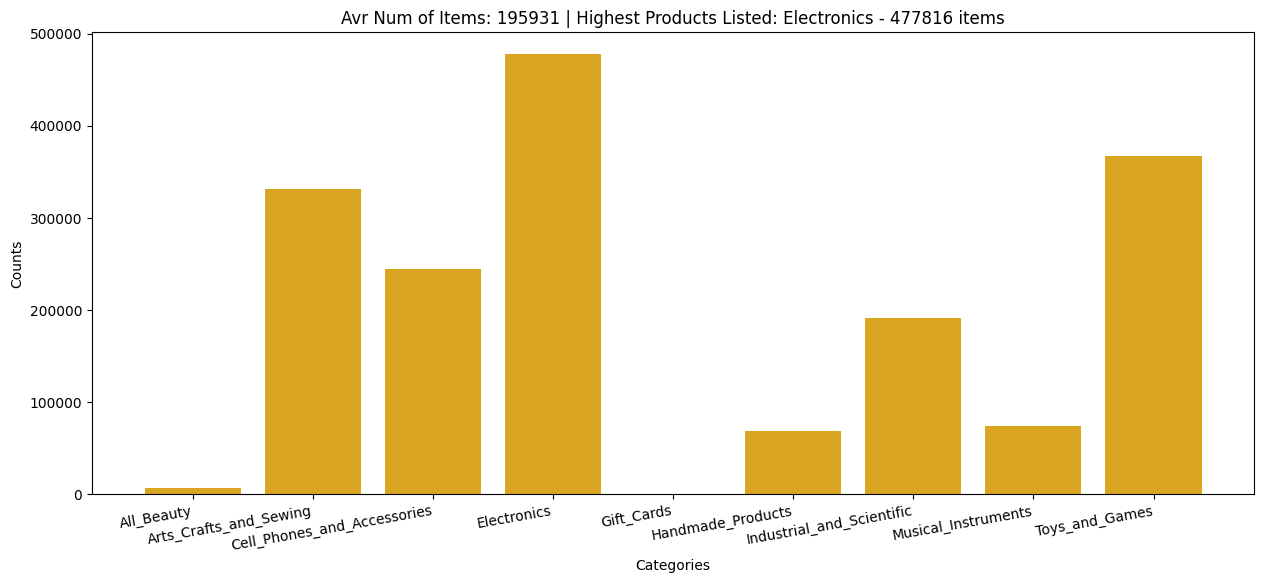

In [15]:
raw_categories = [item.category for item in items]

counter = Counter(raw_categories)

### Category with the highest number of items
top_category = counter.most_common(1)

### keys and values - keys: categories | values: item counts
# key_list = [k for k, v in counter.items()]
# value_list = [v for k, v in counter.items()]

categories, counts = zip(*counter.items())

plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color="goldenrod")
plt.title(f"Avr Num of Items: {round(counter.total() / len(categories))} | Highest Products Listed: {top_category[0][0]} - {top_category[0][1]} items")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.xticks(rotation=10, ha="right")
plt.show()

In [16]:
print(items[0])

<Lurrose 100Pcs Full Cover Fake Toenails Artificial Transparent Nail Tips Nail Art for DIY = $6.99>


## Objective

Craft a dataset which is more balanced in terms of prices. Less heavily scewed to cheap items, with an average that's higher than $60. Try to balance out the categories - fewer Automotive items.

In [8]:
slots = defaultdict(list)
for item in items: 
    slots[round(item.price)].append(item)


In [9]:
# Create a dataset called "sample" which tries to more evenly take from the range of prices
# And gives more weight to items from categories other than Automotive
# Set random seed for reproducibility

np.random.seed(42)
random.seed(42)

### samples list with data sorted by lower price to higher order: range(1, 1000)
samples = []

for i in range(1, 1000): 
    slot = slots[i]
    if i >= 240:
        samples.extend(slot) 
    elif len(slot) <= 1200: 
        samples.extend(slot) 
    else: 
        weights = np.array([1 if item.category == "Electronics" else 5 for item in slot])
        weights = weights / sum(weights) 
        selected_indices = np.random.choice(len(slot), size=1200, replace=False, p=weights) 
        selected = [slot[i] for i in selected_indices]
        samples.extend(selected)
        
print(f"There are {len(samples):,} items in the sample")
        

There are 169,637 items in the sample


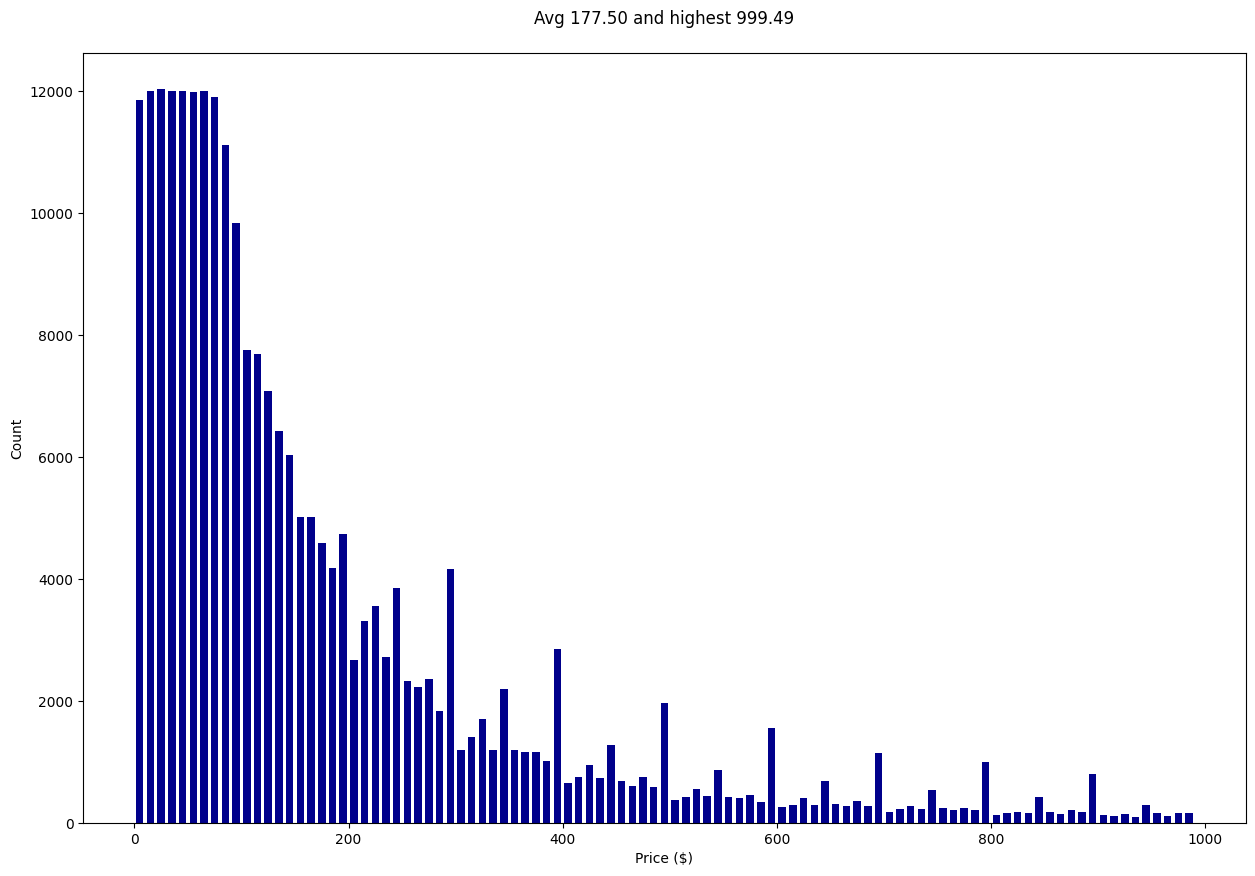

In [19]:
# Plot the distribution of prices in sample

prices = [float(item.price) for item in samples]
plt.figure(figsize=(15, 10))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 10))
plt.show()

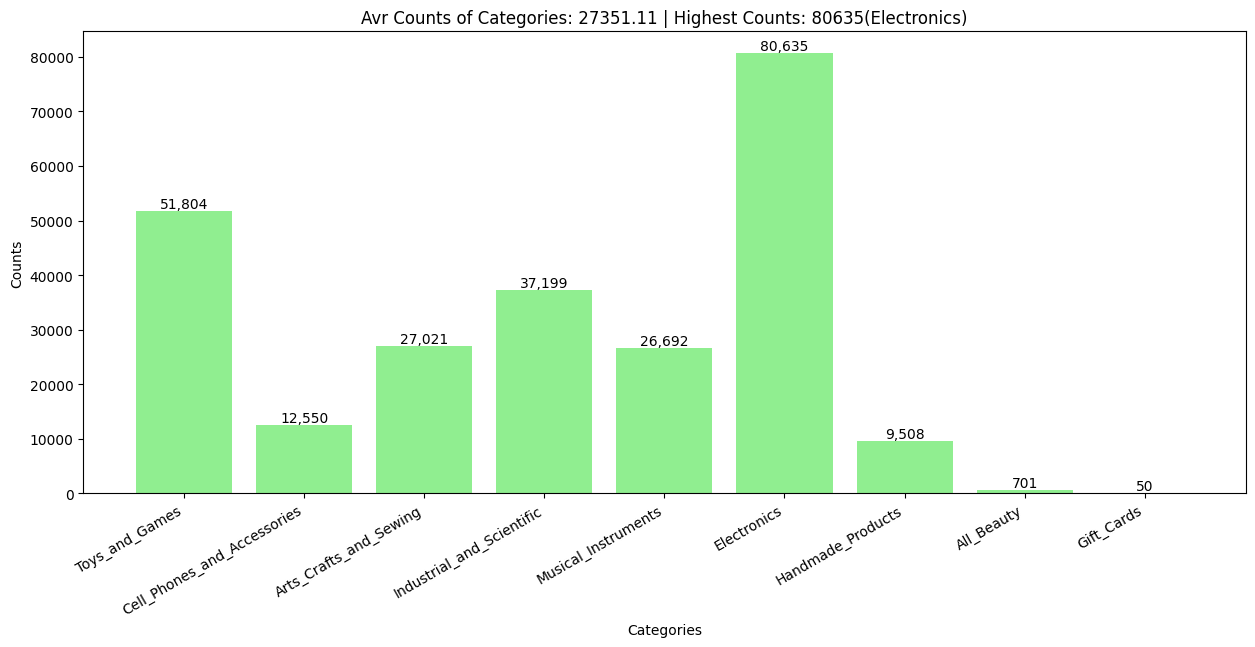

In [20]:
### Category Counter 

categories = [item.category for item in samples]

category_counter = Counter(categories) 

### Separate categories and counts 
cats, counts = zip(*category_counter.items())
### Category with the highest counts
highest_key = category_counter.most_common(1)

### Bar Chart:
plt.figure(figsize=(15, 6))
plt.bar(cats, counts, color="lightgreen")
plt.title(f"Avr Counts of Categories: {sum(counts) / len(counts):.2f} | Highest Counts: {max(counts)}({highest_key[0][0]})")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.xticks(rotation=30, ha="right")


### Add labels on top of each bar 
for i, v in enumerate(counts): 
    plt.text(i, v, f"{v:,}", ha="center", va="bottom")

plt.show()


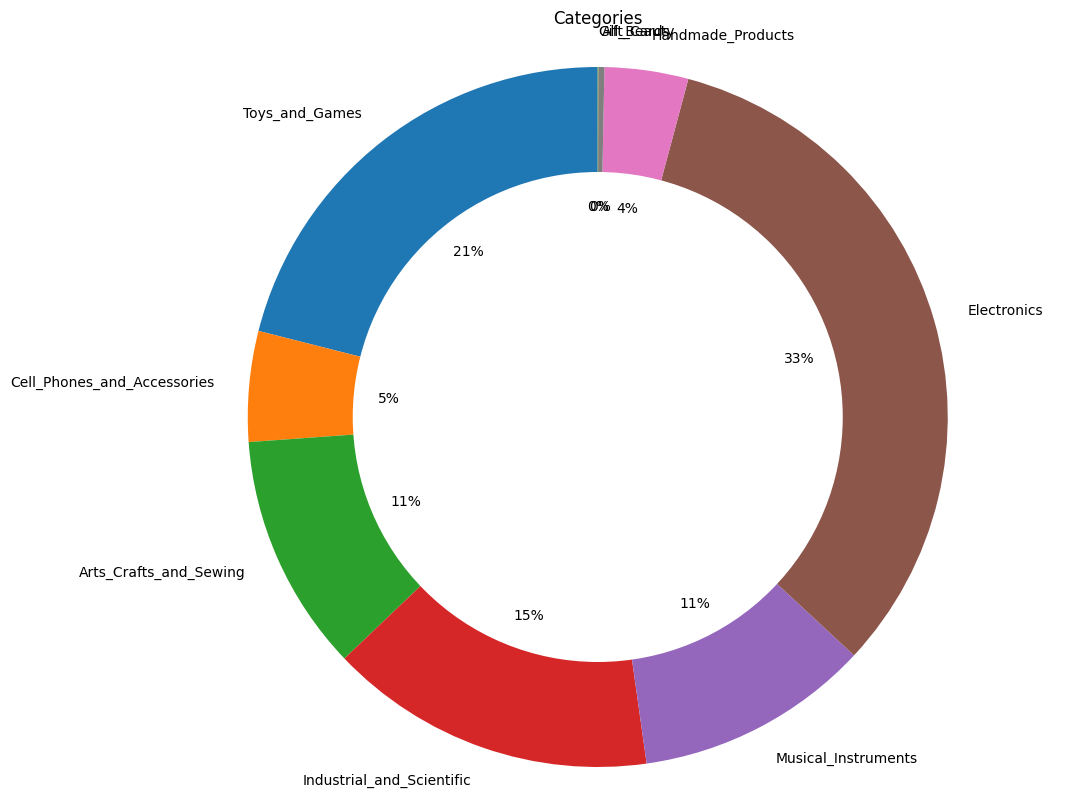

In [21]:
### Pie chart

plt.figure(figsize=(12, 10))
plt.pie(counts, labels=cats, autopct='%1.0f%%', startangle=90)

### Add a circle at the center to create a donut chart (optional)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Categories')

### Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

plt.show()

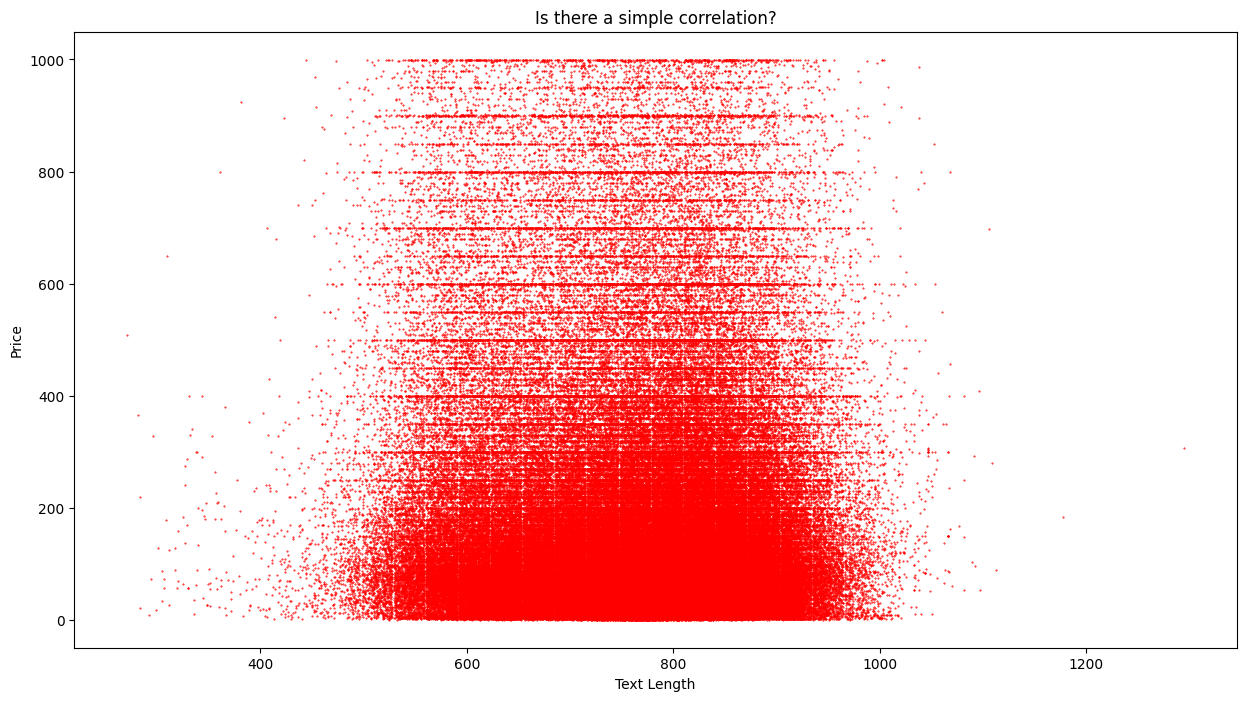

In [22]:
### Correlation between text verbosity and price 

### To Check:
### if high-end products having longer, more detailed descriptions 
### or cheap products having short, minimal text.


sizes = [len(item.prompt) for item in samples]
prices = [item.price for item in samples] 

plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color="red")

plt.title("Is there a simple correlation?")
plt.xlabel("Text Length")
plt.ylabel("Price")

plt.show()

In [12]:
def report(item): 
    prompt = item.prompt 
    tokens = Item.tokenizer.encode(item.prompt)
    print("PROMPT:\n", prompt)
    print("\n")
    ### Check the last 10 tokens and text to check tokenizer correctly includes the target prompt 
    print("Last 10 Tokens:\n",tokens[-10:])
    print("\n")
    print("Last 10 Decoded:\n",Item.tokenizer.batch_decode(tokens[-10:]))

print(report(samples[111]))

PROMPT:
 How much does this cost to the nearest dollar?

Main_Category: Industrial & Scientific

SuperEcable - 20268, USB2.0 A Male to A Male Interface Cable. 3 Ft
Up to 480 Mbps /sec transfer Compatible with over 100 devices including  Printers, scanners, mouse, keyboard, digital camera, web camera and more. Computer Universal Series Bus Interface Cable Connector   1. 24K Gold Plated A Type Male 2. Connector with 50 micron gold plated connector Cable  UL Type awm 2835 / 1 Pair and 24 AWG / 2 C " Cable   Translucent Blue Color USB2.0 Data Cable IBM Apple Mac Compatible Compatible Cable   100% Copper wire & Triple shielding. USB2.0 A Male to Male Interface Cable  "Brand"  "Vaster", "Connector

Price is $1.00


Last 10 Tokens:
 [498, 330, 37054, 271, 7117, 374, 400, 16, 13, 410]


Last 10 Decoded:
 ['",', ' "', 'Connector', '\n\n', 'Price', ' is', ' $', '1', '.', '00']
None


In [21]:
random.seed(42)
random.shuffle(samples)

print(len(samples))
### Use 5% - 10% of the whole data for testing purposes
train = samples[:150_000]
test = samples[150_000:169_000]

print(f"Length of Train Data: {len(train)}\nLength of Test Data: {len(test)}")

169637
Length of Train Data: 150000
Length of Test Data: 19000


In [22]:
print(train[0].prompt)

How much does this cost to the nearest dollar?

Main_Category: Computers

ODROID 5V/4A Power Supply US Plug
Note  This unit comes with a US style plug Note  This unit comes with a US style plug DC 5Volt / 4A output DC 5Volt / 4A output Switching mode power adaptor Switching mode power adaptor Plug specification   inner(positive) diameter 2.1mm and outer(negative) diameter 5.5mm Plug specification   inner(positive) diameter 2.1mm and outer(negative) diameter 5.5mm Tested with Tested with Tested with tablet package Tested with tablet package Note  This unit comes with a US style plug. DC 5Volt / 4A output Switching mode power adaptor Plug specification   inner(positive) diameter 2.1mm and

Price is $12.00


In [23]:
print(test[10].test_prompt())

How much does this cost to the nearest dollar?

Main_Category: All Electronics

Allstate B2B 3-Year Musical Instruments Accidental Protection Plan
Upon purchase, you will get an email confirmation from Allstate/SquareTrade. You will not be mailed a paper contract. If you have questions, please call  Plan starts on the date of purchase. Product damages from accidents are covered from day one. Product breakdowns and malfunctions are covered after manufacturer's warranty. No additional costs for repairs - parts, labor, and shipping are all included. Cancel anytime, full refund in the first 30 days. Transferable with gifts Easy claims process - file a claim anytime 24/7 via mobile app, online, or phone.  "Date First Available"  "June 8, 2017", ""  "SquareTrade"

Price is $


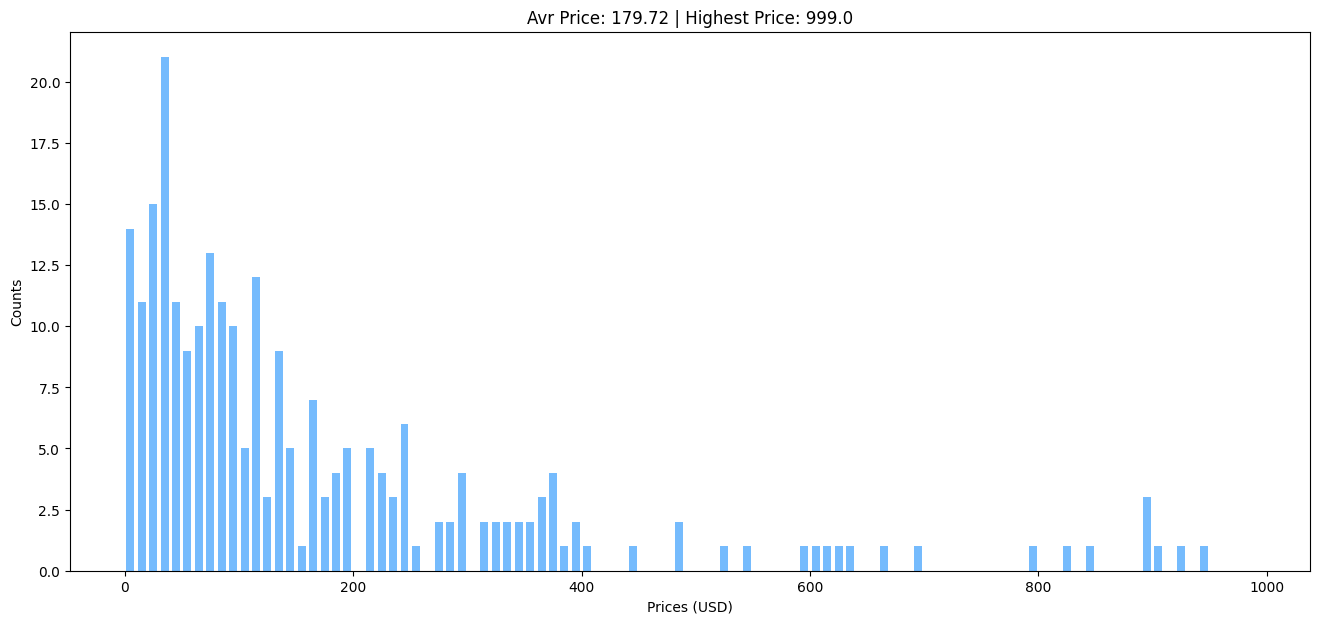

In [27]:
# Plot the distribution of prices in the first 250 test points

prices = [item.price for item in test[:250]]

plt.figure(figsize=(16, 7))
plt.title(f"Avr Price: {sum(prices) / len(prices):.2f} | Highest Price: {max(prices)}")
plt.xlabel("Prices (USD)")
plt.ylabel("Counts")
plt.hist(prices, rwidth=0.7, color="xkcd:sky blue", bins=range(0, 1000, 10))
plt.show()

## Upload Dataset

In [24]:
train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]
test_prompts = [item.prompt for item in test]
test_prices = [item.price for item in test]

In [25]:
### Create a Dataset from the lists

train_dataset = Dataset.from_dict({"text": train_prompts, "price": train_prices})
test_dataset = Dataset.from_dict({"text": test_prompts, "price": test_prices})

dataset = DatasetDict({
    "train": train_dataset, 
    "test": test_dataset
})
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'price'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['text', 'price'],
        num_rows: 19000
    })
})


In [29]:
### Push to HF Hub

### Some Hugging Face issue to push the dataset to HF hub. 
# HF_USER = "MightyOctopus"
# DATASET_NAME = f"{HF_USER}/amazon-pricer-dataset-v2-0"

# dataset.push_to_hub(
#     DATASET_NAME, 
#     private=True,
#     max_shard_size="500MB"
# )


### Local download and push it to repo in the CLI:
# LOCAL_DATA_PATH = "amazon_price_data"
# dataset.save_to_disk(LOCAL_DATA_PATH)

### Local download above didn't generate the proper parquet files,
### so trying a different way. 
dataset["train"].to_parquet("train.parquet")
dataset["test"].to_parquet("test.parquet")


Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

14599571

In [30]:
with open("train.pkl", "wb") as f: 
    pickle.dump(train, f)

with open("test.pkl", "wb") as f: 
    pickle.dump(test, f)